<a href="https://colab.research.google.com/github/SchrOdinger11/RecommendationMusic/blob/main/MusicRecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
#installing mtcnn
!pip install mtcnn


     |████████████████████████████████| 2.3 MB 5.1 MB/s 


In [ ]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from PIL import Image 
from numpy import savez_compressed
from numpy import asarray
from os import listdir
from mtcnn.mtcnn import MTCNN
import numpy as np
from numpy import savez_compressed
from keras.models import load_model 


Face Detection

In [ ]:
def extract_face(image):  #image passed as parameter
  img1 = Image.open(image)        #opening the image using PIL module    
  img1 = img1.convert('RGB')       #convert the image into RGB format  
  pixels = asarray(img1)             #convert the pixels in image to an array 
  detector = MTCNN()                 #object of mtcnn class
  f = detector.detect_faces(pixels)   #detect_face function of mtcnn
  print(f)
  #create a bounding box top lef coordinates x1,y1 followed by width w and height h  
  #f is a dictionary with multiple elements and we need to store the coordinates of box from it
  x1,y1,w,h = f[0]['box']           
  x1, y1 = abs(x1), abs(y1)
  x2 = abs(x1+w)
  y2 = abs(y1+h)
  store_face = pixels[y1:y2,x1:x2] #store faces shown by the coordinate system.
  plt.imshow(store_face)
  image1 = Image.fromarray(store_face,'RGB')   
  image1 = image1.resize((160,160))             
  face_array = asarray(image1)                  
  return face_array

Loading the faces

In [ ]:
def load_faces(directory):
  face = []
  i=1
  for filename in listdir(directory):
    path = directory + filename
    faces = extract_face(path)
    face.append(faces)
  return face

Load the Dataset

[{'box': [180, 49, 185, 259], 'confidence': 0.9962970614433289, 'keypoints': {'left_eye': (204, 162), 'right_eye': (282, 143), 'nose': (237, 217), 'mouth_left': (239, 261), 'mouth_right': (297, 247)}}]
[{'box': [292, 69, 117, 170], 'confidence': 0.9999319314956665, 'keypoints': {'left_eye': (337, 134), 'right_eye': (390, 139), 'nose': (375, 172), 'mouth_left': (331, 188), 'mouth_right': (384, 192)}}]
[{'box': [151, 79, 202, 271], 'confidence': 0.9999995231628418, 'keypoints': {'left_eye': (180, 183), 'right_eye': (254, 178), 'nose': (196, 240), 'mouth_left': (194, 293), 'mouth_right': (253, 291)}}]
[{'box': [368, 31, 235, 361], 'confidence': 0.9979134202003479, 'keypoints': {'left_eye': (459, 175), 'right_eye': (568, 179), 'nose': (534, 260), 'mouth_left': (447, 290), 'mouth_right': (559, 291)}}]
[{'box': [331, 7, 216, 282], 'confidence': 0.9973791837692261, 'keypoints': {'left_eye': (400, 125), 'right_eye': (498, 117), 'nose': (459, 195), 'mouth_left': (422, 238), 'mouth_right': (495,

KeyboardInterrupt: ignored

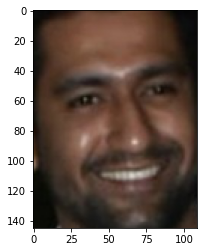

In [ ]:
def load_dataset(directory):
  x, y = [],[]
  i=1
  
  for subdir in listdir(directory):
    path = directory + subdir + '/'
    faces = load_faces(path)
    labels = [subdir for _ in range(len(faces))]
    print("%d There are %d images in the class %s:"%(i,len(faces),subdir))
    x.extend(faces)
    y.extend(labels)
    i=i+1
  return asarray(x),asarray(y)  

trainX,trainY = load_dataset('/content/drive/MyDrive/Indian-celebrities/')


In [ ]:
print(trainX.shape,trainY.shape)
savez_compressed('/content/drive/MyDrive/MusicDataset/PROJECTS/face recog + mood/Indian-celeb-dataset.npz',trainX,trainY)


NameError: ignored

Function for Generating embeddings from the face


In [ ]:

import numpy as np
def extract_embeddings(model,face_pixels):
  face_pixels = face_pixels.astype('float32')  
  mean = face_pixels.mean()                   
  std  = face_pixels.std()                #normalization of image pixels    
  face_pixels = (face_pixels - mean)/std       
  samples = np.expand_dims(face_pixels,axis=0)    
  yhat = model.predict(samples)
  #disp(yhat[0])
  return yhat[0]

Load the data and run extract_embedding function


In [ ]:
data = np.load('/content/drive/MyDrive/MusicDataset/PROJECTS/face recog + mood/Indian-celeb-dataset.npz')
trainx, trainy = data['arr_0'],data['arr_1']
#print(trainx)
#print(trainy)
print(trainx.shape, trainy.shape)

model = load_model('/content/drive/MyDrive/MusicDataset/model/facenet_keras.h5')
#128 pixel values

#get the face embeddings
new_trainx = list()
for train_pixels in trainx:
  embeddings = extract_embeddings(model,train_pixels)
  new_trainx.append(embeddings)
new_trainx = np.asarray(new_trainx)            
print(new_trainx.shape)
print(new_trainx)
#save the arrays in compressed format
savez_compressed('/content/drive/MyDrive/MusicDataset/PROJECTS/Indian-celeb-embeddings.npz',new_trainx,trainy)

(1538, 160, 160, 3) (1538,)


KeyboardInterrupt: ignored

## Model Train from the embeddings 

[{'box': [335, 32, 87, 122], 'confidence': 0.9999803304672241, 'keypoints': {'left_eye': (359, 82), 'right_eye': (400, 82), 'nose': (379, 108), 'mouth_left': (360, 125), 'mouth_right': (398, 124)}}]
Input test data shape:  (400, 735, 3)
Input test embedding shape:  (1, 128)
Loaded data: Train=1538 , Test=1


Text(0.5, 0, 'Detected Face')

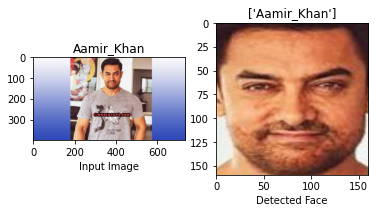

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
from numpy import array
from mtcnn.mtcnn import MTCNN
from keras.models import load_model
from numpy import expand_dims
from numpy import reshape
from numpy import load
from numpy import max
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
import matplotlib.image as mpimg

Img = '/content/drive/MyDrive/MusicDataset/Indian-celebrities/Aamir_Khan/Aamir_Khan_8.jpg'

face = extract_face(Img)

input_image=mpimg.imread(Img)


plt.imshow(input_image)

testx = face.reshape(-1,160,160,3)
print("Input test data shape: ",input_image.shape)




#find embeddings
model = load_model('/content/drive/MyDrive/MusicDataset/model/facenet_keras.h5')
new_testx = list()
for test_pixels in testx:
  embeddings = extract_embeddings(model,test_pixels)
  new_testx.append(embeddings)
new_testx = asarray(new_testx)  
print("Input test embedding shape: ",new_testx.shape)

data1 = load('/content/drive/MyDrive/MusicDataset/PROJECTS/face recog + mood/Indian-celeb-dataset.npz')
train_x,train_y = data1['arr_0'],data1['arr_1']

data = load('/content/drive/MyDrive/MusicDataset/PROJECTS/Indian-celeb-embeddings.npz')
trainx,trainy= data['arr_0'],data['arr_1']
print("Loaded data: Train=%d , Test=%d"%(trainx.shape[0],new_testx.shape[0]))

#normalize the input 
in_encode = Normalizer(norm='l2')
trainx = in_encode.transform(trainx)
new_testx = in_encode.transform(new_testx)

#create label vector
out_encode = LabelEncoder()
out_encode.fit(trainy)
trainy = out_encode.transform(trainy)

#svm classifier model 
model =SVC(kernel='linear', probability=True)
model.fit(trainx,trainy)

#predict
predict_train = model.predict(trainx)
predict_test = model.predict(new_testx)

#Accuracy
acc_train = accuracy_score(trainy,predict_train)

#display
trainy_list = list(trainy)
p=int(predict_test)
if p in trainy_list:
  val = trainy_list.index(p)

#display Predicated data
plt.subplot(1,2,1)
plt.imshow(input_image)  
trainy = out_encode.inverse_transform(trainy)
plt.title(trainy[val])
plt.xlabel("Input Image")
#display Input Image
plt.subplot(1,2,2)
plt.imshow(face)
predict_test = out_encode.inverse_transform(predict_test)
plt.title(predict_test)
plt.xlabel("Detected Face")


TESTING-FACE DETECTION 

[{'box': [480, 101, 230, 307], 'confidence': 0.999995231628418, 'keypoints': {'left_eye': (539, 209), 'right_eye': (648, 211), 'nose': (590, 269), 'mouth_left': (549, 327), 'mouth_right': (636, 331)}}]
(667, 1200, 3)


Text(0.5, 1.0, "['Akshay_Kumar']")

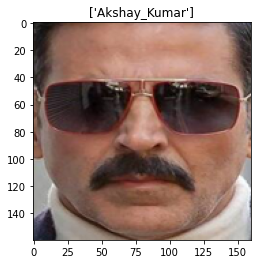

In [ ]:
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
loaded_model = pickle.load(open('/content/drive/MyDrive/MusicDataset/model/SVMmodel.sav', 'rb'))
facenet=load_model('/content/drive/MyDrive/MusicDataset/model/facenet_keras.h5')
Img ='/content/drive/MyDrive/MusicDataset/PROJECTS/testing/testingimg/akshay-kumar-1200.jpg'
#'/content/drive/MyDrive/MusicDataset/Indian-celebrities/Akshay_Kumar/Akshay_Kumar_0.jpg'
#plt.imshow(Img)
face = extract_face(Img)
testx = face.reshape(-1,160,160,3)
new_testx = list()
for test_pixels in testx:
  embeddings = extract_embeddings(facenet,test_pixels)
  new_testx.append(embeddings)
new_testx = asarray(new_testx)
import cv2
img = cv2. imread(Img)

#ref data for label encoding
data = np.load('/content/drive/MyDrive/MusicDataset/PROJECTS/Indian-celeb-embeddings.npz')
trainx,trainy= data['arr_0'],data['arr_1']
out_encode = LabelEncoder()
out_encode.fit(trainy)

in_encode = Normalizer(norm='l2')
new_testx = in_encode.transform(new_testx)
predict_test = loaded_model.predict(new_testx)
#plt.imshow(Img)
from google.colab.patches import cv2_imshow
print(img.shape)
#cv2_imshow(img.resize(img,(160,160)))
plt.imshow(face)
predict_test = out_encode.inverse_transform(predict_test)
plt.title(predict_test)

In [ ]:
print(acc_train) #SVC classifier

0.9986996098829649


In [ ]:
import pickle
pickle.dump(model, open('/content/drive/MyDrive/MusicDataset/model/SVMmodel.sav', 'wb'))

MOOD PREDICTIONS

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

num_classes=5
img_rows,img_cols=48,48
batch_size=128

train_data_dir='/content/drive/MyDrive/MusicDataset/PROJECTS/face recog + mood/fer2013/train'
validation_data_dir='/content/drive/MyDrive/MusicDataset/PROJECTS/face recog + mood/fer2013/validation'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        color_mode='grayscale',
                        target_size=(img_rows,img_cols),
                        batch_size=batch_size,
                        class_mode='categorical',
                        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                                validation_data_dir,
                                color_mode='grayscale',
                                target_size=(img_rows,img_cols),
                                batch_size=batch_size,
                                class_mode='categorical',
                                shuffle=True)

Found 28353 images belonging to 6 classes.
Found 3534 images belonging to 6 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                        

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint('/content/drive/MyDrive/MusicDataset/PROJECTS/face recog + mood/EmotionDetectionModel.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

epochs=2

history=model.fit(train_generator, epochs=epochs,callbacks=callbacks,validation_data=validation_generator)
             
                
               
                
loss_train = history.history['train_loss']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/2


InvalidArgumentError: ignored

TESTING-EmotionDetector

In [ ]:
#TESTING
from keras.models import load_model
import pickle
import numpy as np
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)   
class_labels=['Angry','Happy','Neutral','Sad','Surprise']

emotdet=load_model('/content/drive/MyDrive/MusicDataset/model/EmotionDetectionModelV2.h5')

In [ ]:
!pip install curtsies

[{'box': [363, 176, 82, 100], 'confidence': 0.9952207207679749, 'keypoints': {'left_eye': (395, 210), 'right_eye': (424, 228), 'nose': (403, 240), 'mouth_left': (377, 246), 'mouth_right': (401, 261)}}]


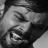

Angry
##################################################################################
[{'box': [362, 479, 294, 384], 'confidence': 0.9999996423721313, 'keypoints': {'left_eye': (424, 619), 'right_eye': (559, 620), 'nose': (471, 701), 'mouth_left': (430, 763), 'mouth_right': (549, 772)}}]


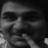

Happy
##################################################################################
[{'box': [193, 926, 235, 294], 'confidence': 0.9999978542327881, 'keypoints': {'left_eye': (260, 1038), 'right_eye': (362, 1043), 'nose': (297, 1096), 'mouth_left': (256, 1151), 'mouth_right': (345, 1156)}}]


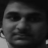

Sad
##################################################################################
[{'box': [315, 103, 461, 605], 'confidence': 1.0, 'keypoints': {'left_eye': (430, 357), 'right_eye': (646, 368), 'nose': (522, 477), 'mouth_left': (435, 584), 'mouth_right': (612, 593)}}, {'box': [294, 605, 69, 84], 'confidence': 0.9886192083358765, 'keypoints': {'left_eye': (316, 636), 'right_eye': (348, 644), 'nose': (325, 656), 'mouth_left': (308, 668), 'mouth_right': (335, 676)}}]


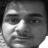

Neutral
##################################################################################
[{'box': [105, 245, 289, 388], 'confidence': 0.9999972581863403, 'keypoints': {'left_eye': (186, 387), 'right_eye': (317, 414), 'nose': (235, 476), 'mouth_left': (158, 507), 'mouth_right': (301, 536)}}]


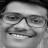

Happy
##################################################################################
[{'box': [25, 68, 234, 289], 'confidence': 0.9999589920043945, 'keypoints': {'left_eye': (76, 178), 'right_eye': (182, 187), 'nose': (112, 250), 'mouth_left': (67, 278), 'mouth_right': (177, 288)}}]


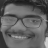

Happy
##################################################################################


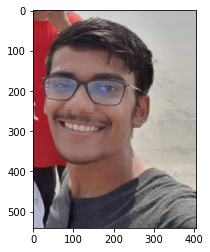

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from curtsies.fmtfuncs import red, green, yellow, blue, cyan
for i in range(1,7):
  Img = f'/content/drive/MyDrive/MusicDataset/PROJECTS/testing/testingimg/{i}.jpg'
  face = extract_face(Img)
  face=cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
  face=cv2.resize(face, (48,48), interpolation = cv2.INTER_AREA)
  plt.imshow(Image.open(Img))
  cv2_imshow(face)
  face=face.astype('float')/255.0
  face=img_to_array(face)
  face=np.expand_dims(face,axis=0)
  preds=emotdet.predict(face)
 
  pred=preds[0]
  print(cyan(class_labels[pred.argmax()]))
  print('##################################################################################')

MUSIC RECOMMENDATION

In [ ]:
!pip install lightgbm

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

data=pd.read_csv('/content/drive/MyDrive/PROJECTS/data_spotifyV2.csv')
data.drop_duplicates(inplace=True,subset=['name'])
name=data['name'] #input
col_features = ['danceability', 'energy', 'valence', 'loudness'] #features which affect type of music
X = MinMaxScaler().fit_transform(data[col_features]) #stabilize value of input features
print(X)
kmeans = KMeans(init="k-means++",
                n_clusters=3,
                random_state=15).fit(X)
data['kmeans'] = kmeans.labels_
data['song_name']=name

[[0.65085772 0.445      0.127      0.71374816]
 [0.70131181 0.263      0.655      0.57917279]
 [0.43794147 0.177      0.457      0.59379589]
 ...
 [0.77194753 0.663      0.686      0.83787628]
 [0.53985873 0.314      0.0663     0.72162567]
 [0.70232089 0.615      0.438      0.82274841]]


In [ ]:

og_data=data.copy()

In [ ]:
cluster=data.groupby(by=data['kmeans'])
y=data.pop('kmeans')
print(y)
x=data.drop(columns=['name','artists','id','release_date','song_name','id_artists'])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model=LGBMClassifier().fit(x_train,y_train)
model.score(x_train,y_train)
y_pred=model.predict(x_test);

0         1
1         1
2         1
3         1
4         1
         ..
586665    1
586667    1
586668    2
586669    1
586670    0
Name: kmeans, Length: 446475, dtype: int32


In [ ]:
model.score(x_test,y_test)

0.9946424891819493

In [ ]:
df=cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
df.reset_index(level=0, inplace=True)

In [ ]:
EMOTIONS = ["happy","sad","unknown"]
  
def get_results(emotion_code, NUM_RECOMMEND=10):
  happy_set=[]
  sad_set=[]
  unknown_set=[]
  if emotion_code==0:
      happy_set.append(df[df['kmeans']==1]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(happy_set).T
  elif emotion_code==2:
      unknown_set.append(df[df['kmeans']==2]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(unknown_set).T
  else:
      sad_set.append(df[df['kmeans']==0]['song_name'].head(NUM_RECOMMEND))
      return pd.DataFrame(sad_set).T
  # print(len(happy_set))
  # print(len(sad_set))
  # print(len(unknown_set))

In [ ]:
# emotion_word=cyan(class_labels[pred.argmax()]).lower()
emotion_word='Angry'
print(emotion_word)
NUM_RECOMMEND=int(input("Enter number of recommendations: "))
if emotion_word=='Sad':
    emotion_code=0
elif emotion_word=='Angry':
    emotion_code=2
else:
    emotion_code=1
results= get_results(emotion_code,NUM_RECOMMEND)
print(results)
print(emotion_code)

Angry
Enter number of recommendations: 10
                                               song_name
92810                                    Save Your Tears
92811                                          telepatía
93805                                Leave The Door Open
93807  Friday (feat. Mufasa & Hypeman) - Dopamine Re-...
93809                                                 Up
92827                                       Hecha Pa' Mi
93810                                 Goosebumps - Remix
92826                                          positions
93808                            Ella No Es Tuya - Remix
93813                                                911
2


In [ ]:
ids=[]
import numpy as np
for x in np.asarray(results):
  print(x)
  ids.append(og_data[og_data['name']==x[0]]['id'])

['Save Your Tears']
['telepatía']
['Leave The Door Open']
['Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit']
['Up']
["Hecha Pa' Mi"]
['Goosebumps - Remix']
['positions']
['Ella No Es Tuya - Remix']
['911']


Result Analysis

[[28206    87   144]
 [   80 35632    92]
 [  118    77 47183]]


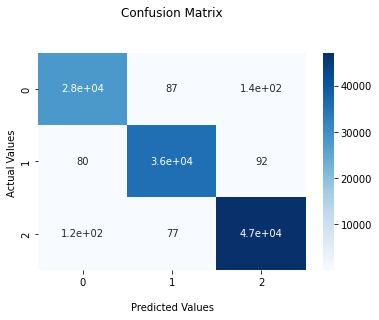

In [ ]:
import matplotlib.pyplot as plt
y_pred=model.predict(x_test);
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [ ]:

!pip install spotipy


In [ ]:
!pip install helpers

In [ ]:
# from  helpers import *
# import spotipy
# from spotipy import SpotifyClientCredentials, util
# import pandas as pd

# client_id='04a6207e56e74913bcaa296057df3efd'
# client_secret='1ce8d0049edc4284a6d719b1692eb1ce'
# redirect_uri='https://www.spotify.com'

# username = 'Schrodinger'
# scope_playlist = 'playlist-modify-public'
# scope_user = 'user-library-modify'
# scope_playing = 'user-read-currently-playing'

# manager = SpotifyClientCredentials(client_id,client_secret)
# sp = spotipy.Spotify(client_credentials_manager=manager)

# #Credentiasl to access the Playlists Music
# token_playlist= util.prompt_for_user_token(username,scope_playlist,client_id,client_secret,redirect_uri) 
# sp_playlist = spotipy.Spotify(auth=token_playlist)


# playlist = sp_playlist.user_playlist_create(username,"personal playlist")
# sp_playlist.user_playlist_add_tracks(username,playlist,ids)

import pandas as pd
import numpy as np
import json
import re 
import sys
import itertools
import cv2
from PIL import Image

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from skimage import io
import matplotlib.pyplot as plt


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

import warnings
warnings.filterwarnings("ignore")

client_id='04a6207e56e74913bcaa296057df3efd'
client_secret='1ce8d0049edc4284a6d719b1692eb1ce'
redirect_uri='https://www.spotify.com'

username = 'mwrslkebp7epvuqsfj1wziqtm'
scope_playlist = 'playlist-modify-public'
scope_user = 'user-library-modify'
scope_playing = 'user-read-currently-playing'

manager = SpotifyClientCredentials(client_id,client_secret)
#sp = spotipy.Spotify(client_credentials_manager=manager)

#Credentiasl to access the Playlists Music
token_playlist= util.prompt_for_user_token(username,scope_playlist,client_id,client_secret,redirect_uri) 
sp_playlist = spotipy.Spotify(auth=token_playlist)


playlist = sp_playlist.user_playlist_create(username,"personal playlist")
sp_playlist.user_playlist_add_tracks(username,playlist,ids)